<a href="https://colab.research.google.com/github/beverast/Notebooks/blob/master/SeabornTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Ultimate Python Seaborn Tutorial: Gotta Catch 'Em All
Link to tutorial: https://elitedatascience.com/python-seaborn-tutorial

This is all code found in the the tutorial linked above, and this is my notebook from coding along for future reference.
I added semicolons to suppress text data, and updated two function calls to use newer seaborn variable names. (Don't suppress the warnings :P)

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [0]:
df = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


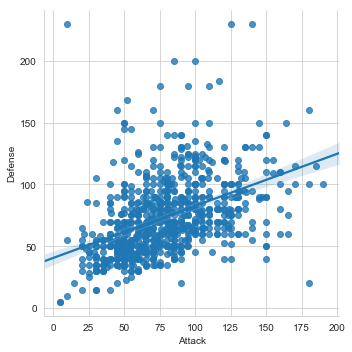

In [0]:
sns.lmplot(x='Attack', y='Defense', data=df);

(0, 201.41580572011196)

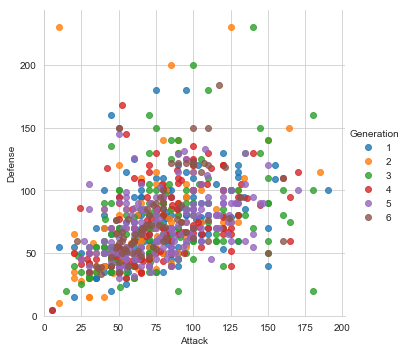

In [0]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False, hue='Generation');

# Tweak seaborn.lmplot() using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

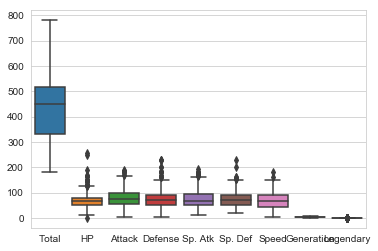

In [0]:
sns.boxplot(data=df);

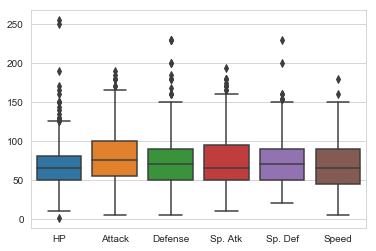

In [0]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Generation', 'Legendary'], axis=1)
# New boxplot using stats_df
sns.boxplot(data=stats_df);

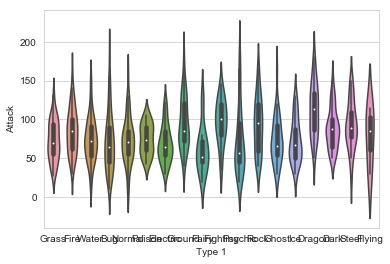

In [0]:
# Set plot theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df);

In [0]:
type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

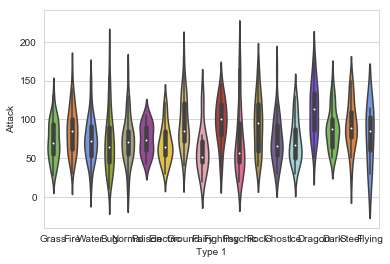

In [0]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, palette=type_colors);

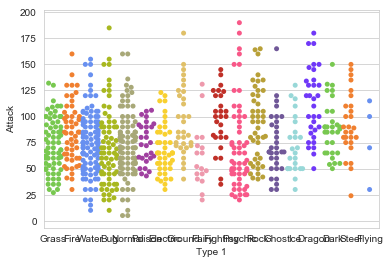

In [0]:
# Swarm plot with Pokemon palette
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=type_colors);

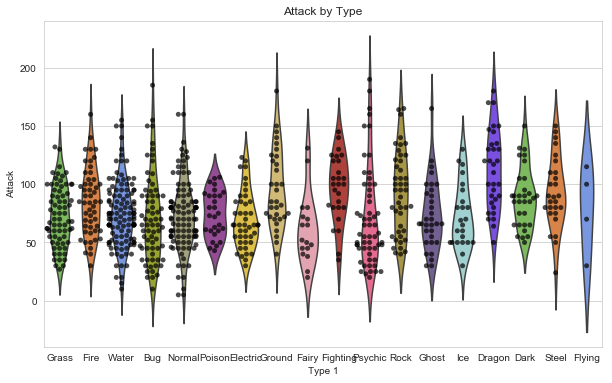

In [0]:
# Set figure size with Matplotlib
plt.figure(figsize=(10,6))

# Create plot
sns.violinplot(x='Type 1', y='Attack', data=df,
              inner=None, palette=type_colors); # Remove bars inside violins
sns.swarmplot(x='Type 1', y='Attack', data=df,
             color='k', alpha=0.7);             # Make points black and slightly transparent

# Set title with matplotlib
plt.title('Attack by Type');

In [0]:
# First 5 rows of stats_df
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


In [0]:
# Melt stats_df
melted_df = pd.melt(stats_df,
                   id_vars=['Name', 'Type 1', 'Type 2'], # Vars to keep
                   var_name="Stat") # Name of melted var
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


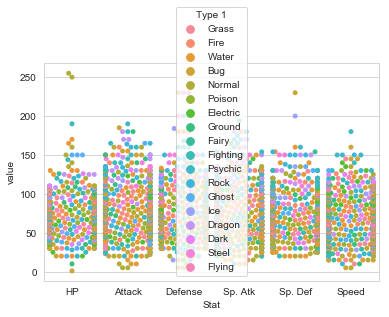

In [0]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1');

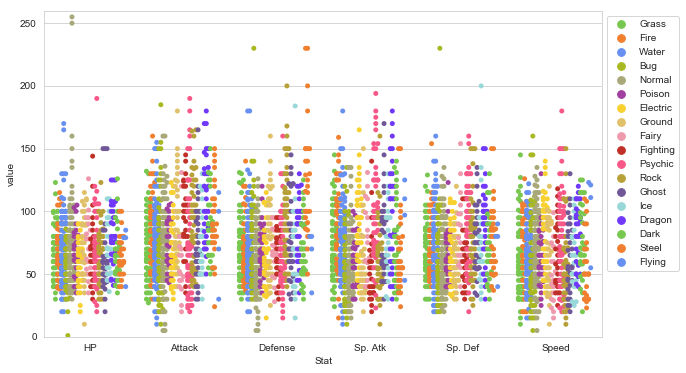

In [0]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',
             y='value',
             data=melted_df,
             hue='Type 1',
             dodge=True,    # 2. Separate points by hue
             palette=type_colors);

# 4. Adjust the y-axis
plt.ylim(0,260)
# 5. Place legend on the right side
plt.legend(bbox_to_anchor=(1,1), loc=2);

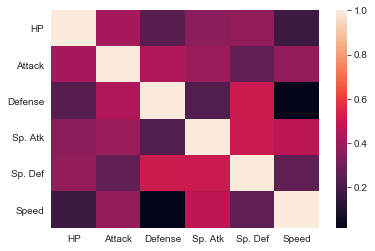

In [0]:
# Calculate correlations
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr);

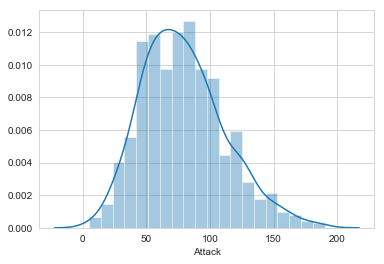

In [0]:
# Distribution Plot / Histogram
sns.distplot(df.Attack);

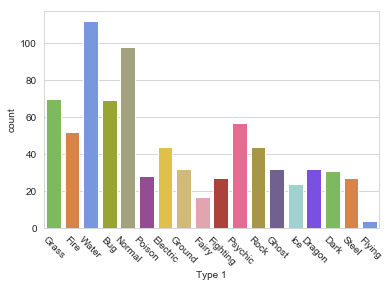

In [0]:
# Count Plot / Bar Plot
sns.countplot(x='Type 1', data=df, palette=type_colors);

# Rotate x-labels
plt.xticks(rotation=-45);

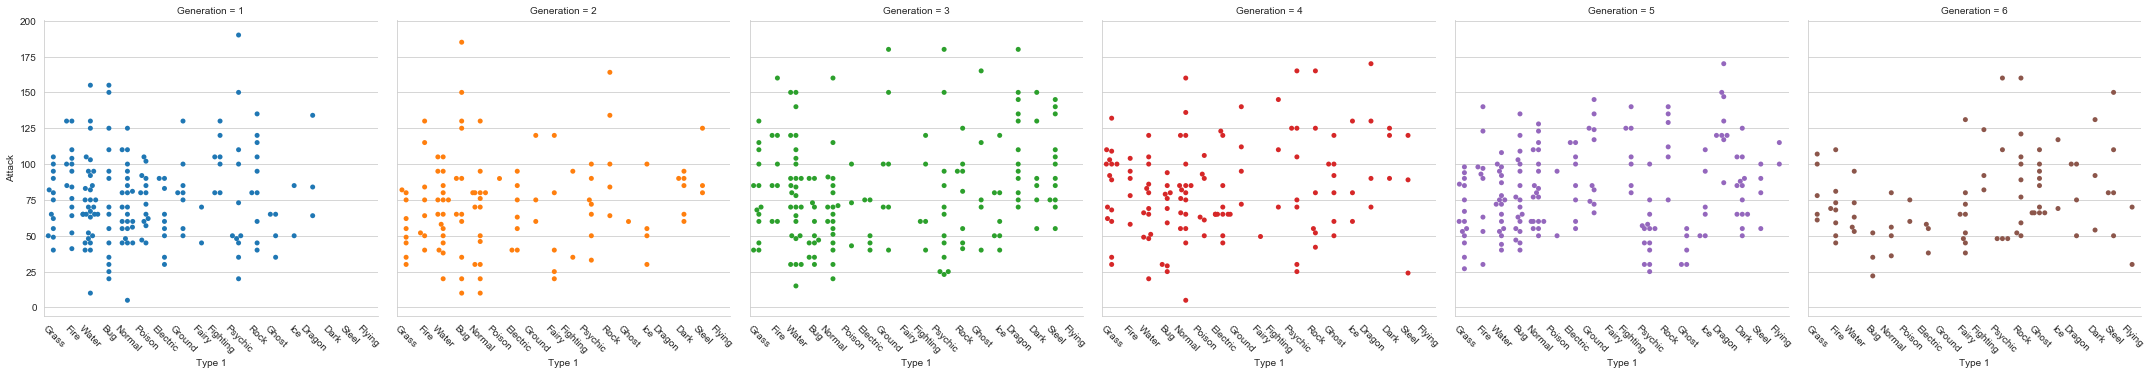

In [0]:
# Factor Plot
g = sns.catplot(x='Type 1',
                  y='Attack',
                  data=df,
                  hue='Generation',   # Color by generation
                  col='Generation',   # Separate by generation
                  kind='swarm');      # Swarmplot

# Rotate x-axis labels
g.set_xticklabels(rotation=-45);

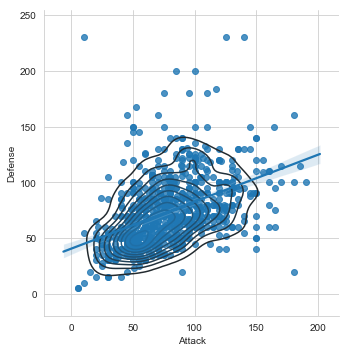

In [0]:
# Density Plot with Scatterplot overlay
sns.lmplot(x='Attack', y='Defense', data=df);
sns.kdeplot(df.Attack, df.Defense);

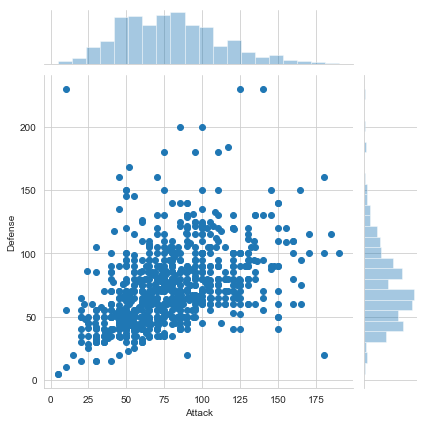

In [0]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df);